In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('..')
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2

/Users/akhilbandi/anaconda3/envs/GLM_tensorflow/lib/python3.9/site-packages/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [58]:
def plot_trace(groundtruth=False):
    plt.figure(figsize=(20,4))
    plt.subplot(211)
    plt.plot(b+c, lw=2, label='denoised')
    plt.plot(y, label='data', zorder=-12, c='y')
    plt.legend(ncol=3, frameon=False, loc=(.02,.85))
    simpleaxis(plt.gca())
    plt.subplot(212)
    plt.plot(s, lw=2, label='deconvolved', c='g')
    #plt.ylim(0,1.3)
    plt.legend(ncol=3, frameon=False, loc=(.02,.85));
    simpleaxis(plt.gca())

In [81]:
path = "/Volumes/Runyan5/Akhil/HR-3-00/suite2p/plane0/"
F = np.load(path + "F.npy")
IsCell = np.load(path + "iscell.npy")
spks = np.load(path + "spks.npy")
F.shape

(3284, 18000)

In [102]:
indices = np.where((IsCell[:,0] == 1) & (IsCell[:,1] > .8))[0]
F_cells = F[indices]
spks_cells = spks[indices]

F_cells.shape

(1241, 18000)

In [163]:
Deconvolved = []
B = []
C = []
G = []
for cell_num in range(len(F_cells)):
    y = F_cells[cell_num]
    c, s, b, g, lam = deconvolve(y, penalty=1)
    Deconvolved.append(s)
    B.append(b)
    C.append(c)
    G.append(g)
Deconvolved = np.array(Deconvolved)
B = np.array(B)
C = np.array(C)
G = np.array(G)

/Users/akhilbandi/anaconda3/envs/GLM_tensorflow/lib/python3.9/site-packages/oasis/functions.py:166: RuntimeWarning: invalid value encountered in multiply
  return constrained_oasisAR1(y, g[0], sn, optimize_b=True if b is None else False,


In [164]:
Deconvolved.shape

(1241, 18000)

In [165]:
Deconvolved[Deconvolved < 100] = 0 

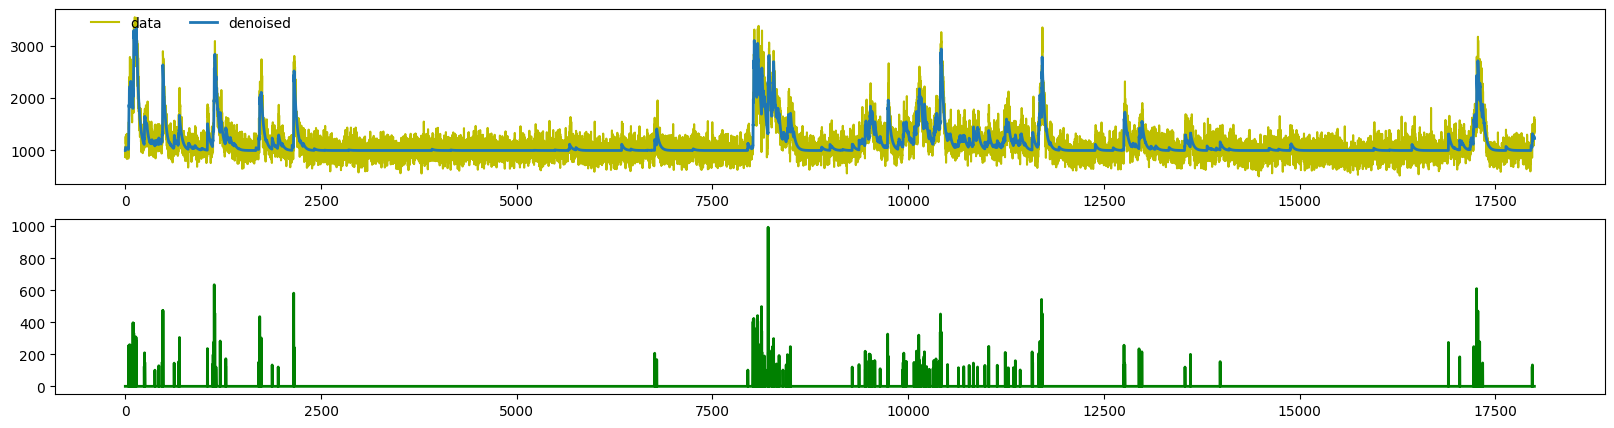

In [166]:
Cell_Num = 86

fig, axs = plt.subplots(2, figsize=(20, 5))

axs[0].plot(F_cells[Cell_Num], label='data', zorder=-12, c='y')
axs[0].plot(B[Cell_Num]+C[Cell_Num], lw=2, label='denoised')
axs[0].legend(ncol=3, frameon=False, loc=(.02,.85))

axs[1].plot(Deconvolved[Cell_Num], lw=2, label='deconvolved', c='g')
#axs[2].plot(spks_cells[Cell_Num], lw=2, label='deconvolved', c='g')


(-0.5, 511.5, 511.5, -0.5)

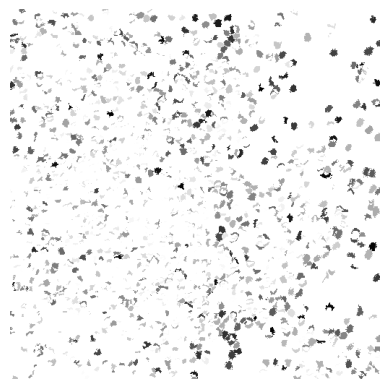

In [167]:
stat = np.load(path +'stat.npy', allow_pickle=True)
ops = np.load(path +'ops.npy', allow_pickle=True).item()

im = np.zeros((ops['Ly'], ops['Lx']))

for n in indices:
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

import matplotlib.colors as mcolors
fig, axs = plt.subplots()

axs.imshow(im, cmap='binary')
axs.axis('off')

In [196]:
from scipy import stats
Deconvolved_z = stats.zscore(Deconvolved, axis = 0)

In [219]:
min_val = np.nanmin(Deconvolved)
max_val = np.nanmax(Deconvolved)
normalized_matrix = (Deconvolved - min_val) / (max_val - min_val)

In [220]:
normalized_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0, 0.5, 'Neurons')

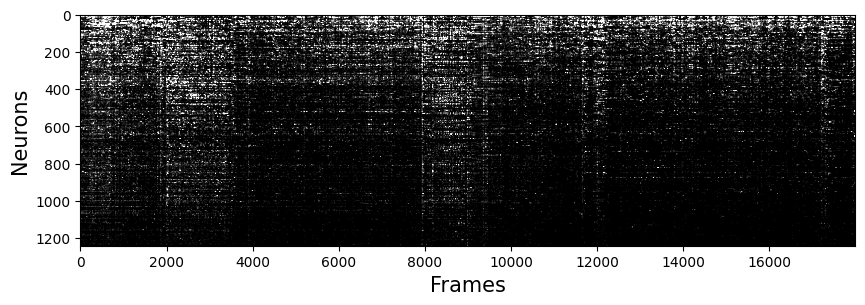

In [241]:
from scipy import stats

fig, axs = plt.subplots(figsize=(10, 3))

axs.imshow(normalized_matrix, vmin=0, vmax=0.005, aspect='auto', cmap='gray')
axs.set_xlabel('Frames', size=15)
axs.set_ylabel('Neurons', size=15)
axs.